# AI Lab-5
## Supervised Machine Learning-Sklearn
### Author : Abdul Basit

### Lab Practice


In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [2]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.data.shape

(150, 4)

In [6]:
iris.target.shape

(150,)

In [7]:
X = iris.data
Y = iris.target
df = pd.DataFrame(X, columns = iris.feature_names)

df['target'] = Y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**KNN Classifier**

In [8]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=6)

In [9]:
model.fit(X,Y)

KNeighborsClassifier(n_neighbors=6)

In [10]:
sample = np.array([[5,3.4,1.3,0.2],[4.8,3.1,1.4,0.2],[5.9,3.0,5.1,1.8]])
result = model.predict(sample)
result

array([0, 0, 2])

In [11]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size = 0.2, shuffle = True)

Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape

((120, 4), (30, 4), (120,), (30,))

In [12]:
model.fit(Xtrain,Ytrain)

KNeighborsClassifier(n_neighbors=6)

In [13]:
results = model.predict(Xtest)
results

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 0, 0, 1, 1, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 1, 2, 0, 2, 2])

In [14]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(results,Ytest)
accuracy

0.9

In [15]:
#Alternate direct method to calculate the accuracy:
model.score(Xtest,Ytest)

0.9

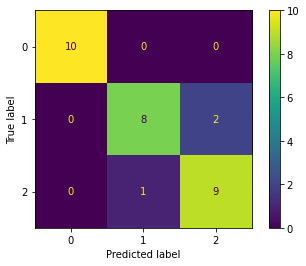

In [16]:
#Plotting the confusion matrix of the model on test: 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,Xtest,Ytest)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(Ytest,results))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.80      0.84        10
           2       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



# Examining Under fitting and over fitting and in Machine learning: 

In [18]:
total_train_accuracy = []
total_test_accuracy = []
neighbors = np.arange(1,9)

Using for loop to iterate over each value of K from 1 to 8 to calculate and store the values of training and testing accuracies in defined list:

In [19]:
for i in range(8):
    knn= KNeighborsClassifier(n_neighbors = i+1)
    #fitting the classifier to training data
    knn.fit(Xtrain,Ytrain)
    
    train_accuracy = knn.score(Xtrain,Ytrain)
    
    test_accuracy = knn.score(Xtest,Ytest)
    
    total_train_accuracy.append(train_accuracy)
    total_test_accuracy.append(test_accuracy)
    

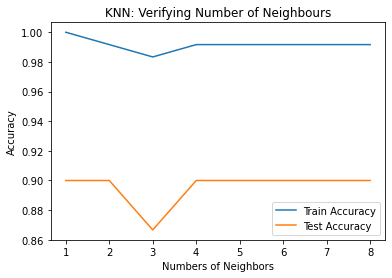

In [20]:
#Generating a plot of the tained and tested data
plt.title('KNN: Verifying Number of Neighbours')
plt.plot(neighbors,total_train_accuracy, label = 'Train Accuracy' )
plt.plot(neighbors,total_test_accuracy, label = 'Test Accuracy' )
plt.legend()
plt.xlabel('Numbers of Neighbors')
plt.ylabel('Accuracy')
plt.show()


# Plotting an image of from the Mnist dataset:  
# Loading the Mnist dataset from sklearn and separating the features and labels: 

In [21]:
mnist = datasets.load_digits()
mnist.target_names
A= mnist.data
B = mnist.target
A,B


(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 array([0, 1, 2, ..., 8, 9, 8]))

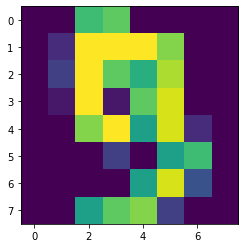

In [22]:
sample = 9
image = A[sample]
image = image.reshape(8,8)

plt.imshow(image)
plt.show()